<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/03_01_k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 리눅스 명령어로 코랩 가상머신에 폰트를 설치/적용하는 명령어
# 차트 한글처리용
!sudo apt-get install -y fonts-nanum # !sudo 가상머신 명령어처리(관리자권한)
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 설치 후에 세션 다시 시작!

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,718 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125081 files and dire

In [1]:
# 대방어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 대방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 대방어의 무게 배열리스트

기초자료


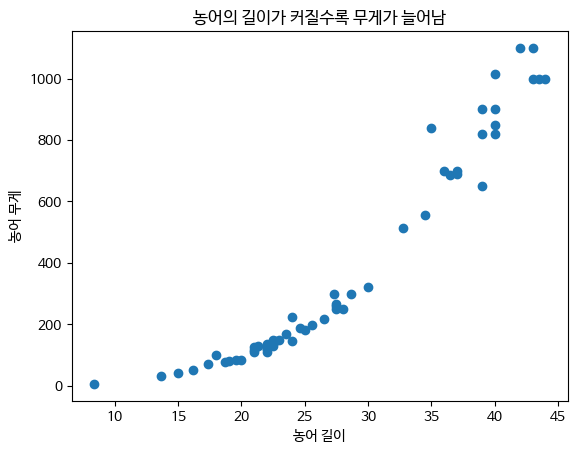

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글처리

plt.scatter(perch_length, perch_weight)
plt.xlabel('농어 길이')
plt.ylabel('농어 무게')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남')
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 크래스로 예측함
# k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판다.
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택
# 타켓값 100, 80, 60을 더해 3으로 나눈 평균이 타깃으로 값으로 사용됨

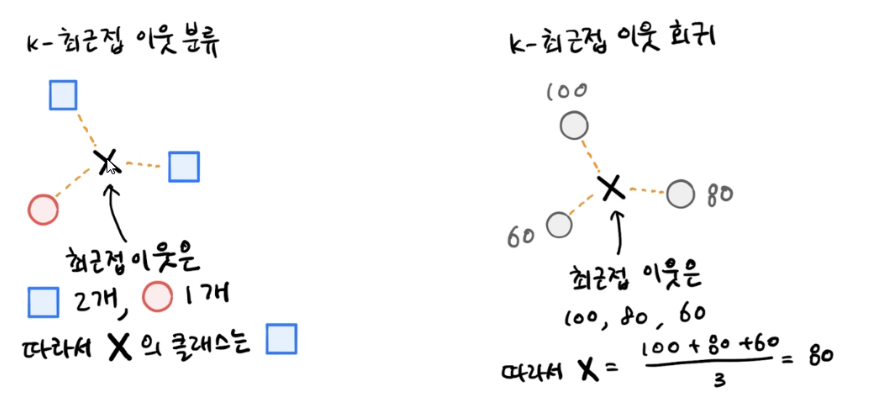

In [12]:

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# stratify 사용하지 않음(분류용) -> 정답파일이 무게 확율이기 때문에

# 사이킷런에 사용할 훈련 세트는 2차원 배열을 사용함
# [3,] -> [3,1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 메서느 활용 (4,) -> (2,2)
print(train_input)
print(train_target)
print(train_input.shape)
print(test_input.shape)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
(42,)
(14,)


In [5]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [7]:
test_array = test_array.reshape(2,2)
print(test_array)

[[1 2]
 [3 4]]


In [19]:
train_input = train_input.reshape(-1,1) # -1 지정하면 원소 개수로 모두 채우라는 의미, 1은 두번째 크기를 1로
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)  # -1을 사용하면 매번 원소의 크기를 외우지 않아도 됨
print(train_input)
print(train_target)

(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [17]:
# 훈련 시작
from sklearn.neighbors import KNeighborsRegressor # 회기 알고리즘용 구현 클래스 (리그래스)

knr = KNeighborsRegressor() # 회귀용 객체 생성

# from sklearn.neighbors impors NKeighbersClassifier # 분류용

knr.fit(train_input, train_target)  # 회귀용으로 훈련
#       농어의 길이, 농어의 무게


KNeighborsRegressor()

In [20]:
knr.score(test_input, test_target)
#         농어 테스트 길이, 농어 테스트 무게
# 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값

# 회귀인 경우에는 평가를 결정 개수라고 함 R^2


0.992809406101064

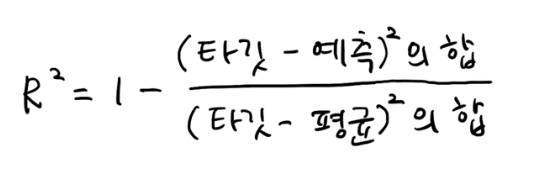

In [25]:
knr.predict([[15]])   # 알고 싶은값 출력 15cm -> 60g
# k-최근접한 5개의 이웃에 대한 값을 99.28$ 확률로 나온 결과 (60g)

array([60.])

In [29]:

from sklearn.metrics import mean_absolute_error # 평균으로 절대값의 오차를 찾는 매서드

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction) # 평균 절대 오차값

print(mae)

19.157142857142862


In [30]:
print(knr.score(train_input, train_target)) # 훈련 모델로 하면 96.98%

0.9698823289099254


In [31]:
knr.score(test_input, test_target)    # 테스트 세트로 평가를 돌려보면 99.28%

0.992809406101064

In [32]:
# 보통 훈련 세트의 점수가 조금 높게 나옴

# 과대적합
# 과소적합 : 훈련세트보다 테스트 세트가 점수 높아???, 두 점수가 무두 낮은경우

In [35]:
# 사이킷 런의 알고리즘 기본값을 3개로 조절해보자
knr.n_neighbors = 3
# 모델을 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [37]:
knr.predict([[15]])

array([47.33333333])

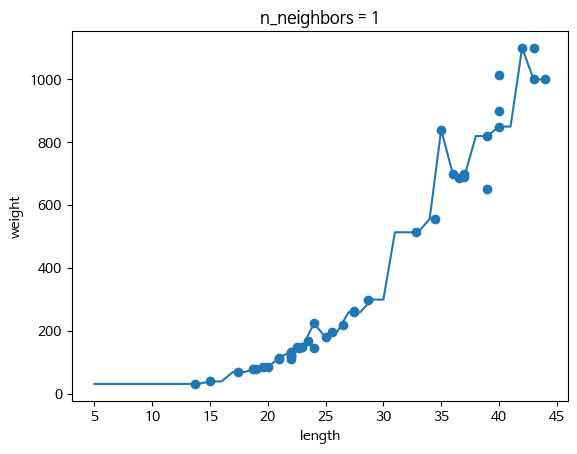

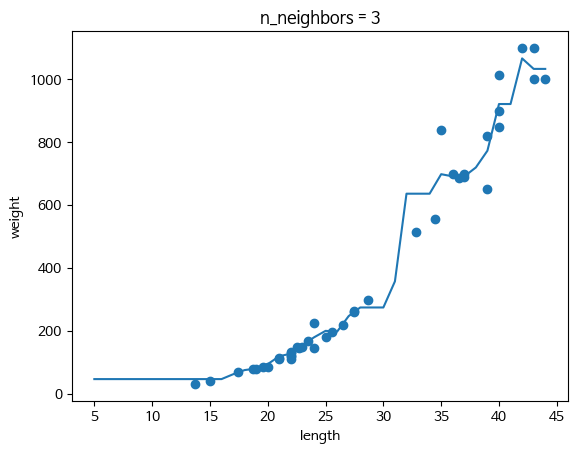

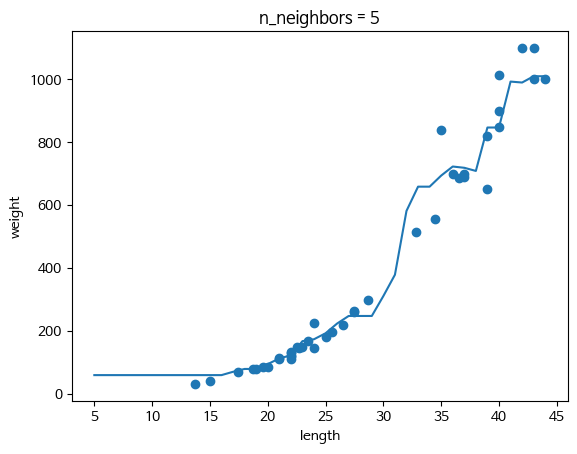

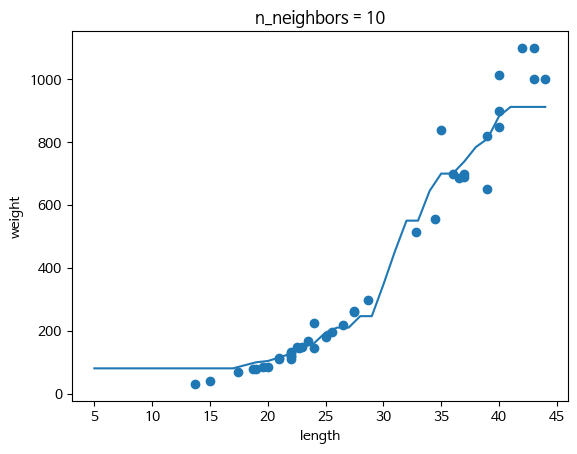

In [39]:

knr = KNeighborsRegressor()

x = np.arange(5,45).reshape(-1,1)

for n in [1,3,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()
